# **Business Case: Yulu**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089' -O yulu.csv

--2023-05-17 05:52:17--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.93, 99.84.178.226, 99.84.178.132, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu.csv’

yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.009s  

2023-05-17 05:52:17 (70.4 MB/s) - ‘yulu.csv’ saved [648353/648353]



## 1. Define Problem Statement and perform Exploratory Data Analysis

**Problem Definition**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute.

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:
1. Which variables are significant in predicting the demand for shared electric 
cycles in the Indian market?
2. How well those variables describe the electric cycle demands.





**Observations on shape of data, data types of all the attributes, missing value detection, statistical summary**

In [3]:
#Observations on shape of data
yulu = pd.read_csv('yulu.csv')
print('rows: ',yulu.shape[0])
print('columns: ',yulu.shape[1])

rows:  10886
columns:  12


In [4]:
#data types of all the attributes
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
#missing value detection
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the given dataset

In [6]:
#statistical summary
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
yulu.describe(include = object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [8]:
#number of unique values in our data
for i in yulu.columns:
  print(i,':',yulu[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [9]:
#value counts of these attribute 
for i in yulu.columns:
  print(i,':',dict(yulu[i].value_counts()))

datetime : {'2011-01-01 00:00:00': 1, '2012-05-01 21:00:00': 1, '2012-05-01 13:00:00': 1, '2012-05-01 14:00:00': 1, '2012-05-01 15:00:00': 1, '2012-05-01 16:00:00': 1, '2012-05-01 17:00:00': 1, '2012-05-01 18:00:00': 1, '2012-05-01 19:00:00': 1, '2012-05-01 20:00:00': 1, '2012-05-01 22:00:00': 1, '2012-05-02 08:00:00': 1, '2012-05-01 23:00:00': 1, '2012-05-02 00:00:00': 1, '2012-05-02 01:00:00': 1, '2012-05-02 02:00:00': 1, '2012-05-02 03:00:00': 1, '2012-05-02 04:00:00': 1, '2012-05-02 05:00:00': 1, '2012-05-02 06:00:00': 1, '2012-05-01 12:00:00': 1, '2012-05-01 11:00:00': 1, '2012-05-01 10:00:00': 1, '2012-05-01 09:00:00': 1, '2012-04-19 16:00:00': 1, '2012-04-19 17:00:00': 1, '2012-04-19 18:00:00': 1, '2012-04-19 19:00:00': 1, '2012-04-19 20:00:00': 1, '2012-04-19 21:00:00': 1, '2012-04-19 22:00:00': 1, '2012-04-19 23:00:00': 1, '2012-05-01 00:00:00': 1, '2012-05-01 01:00:00': 1, '2012-05-01 02:00:00': 1, '2012-05-01 03:00:00': 1, '2012-05-01 04:00:00': 1, '2012-05-01 05:00:00': 1, 

**Visual Analysis**

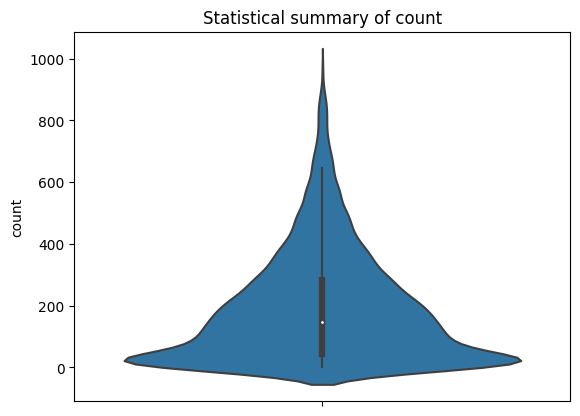

In [10]:
sns.violinplot(data=yulu,y='count')
plt.title('Statistical summary of count')
plt.show()

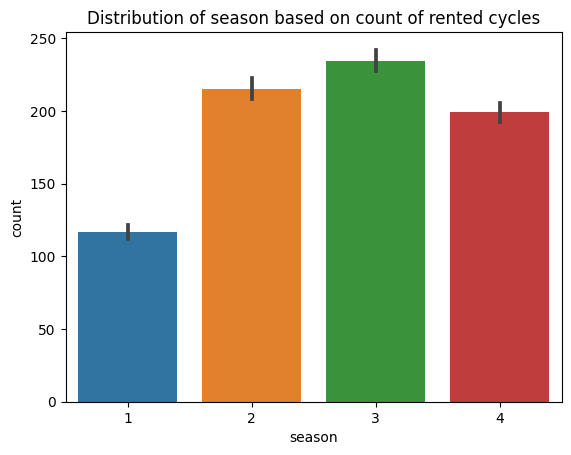

In [11]:
sns.barplot(data=yulu,x='season',y='count')
plt.ylabel('count')
plt.title('Distribution of season based on count of rented cycles')
plt.show()

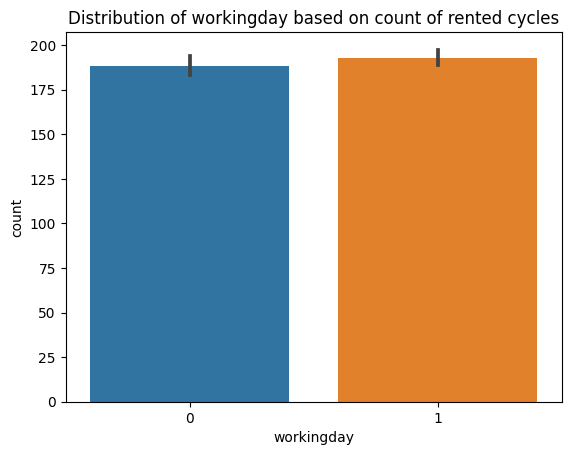

In [12]:
sns.barplot(data=yulu,x='workingday',y='count')
plt.ylabel('count')
plt.title('Distribution of workingday based on count of rented cycles')
plt.show()

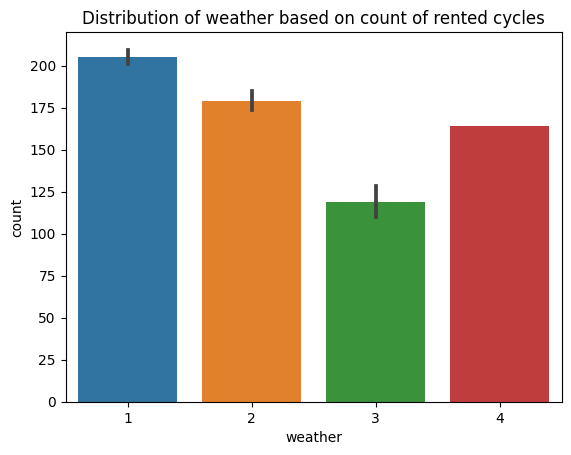

In [13]:
sns.barplot(data=yulu,x='weather',y='count')
plt.ylabel('count')
plt.title('Distribution of weather based on count of rented cycles')
plt.show()

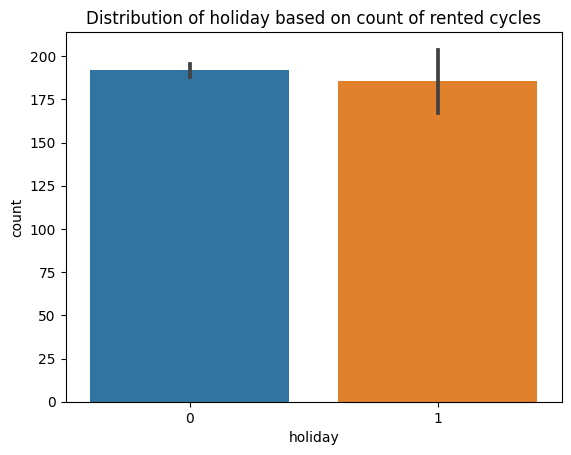

In [14]:
sns.barplot(data=yulu,x='holiday',y='count')
plt.title('Distribution of holiday based on count of rented cycles')
plt.show()

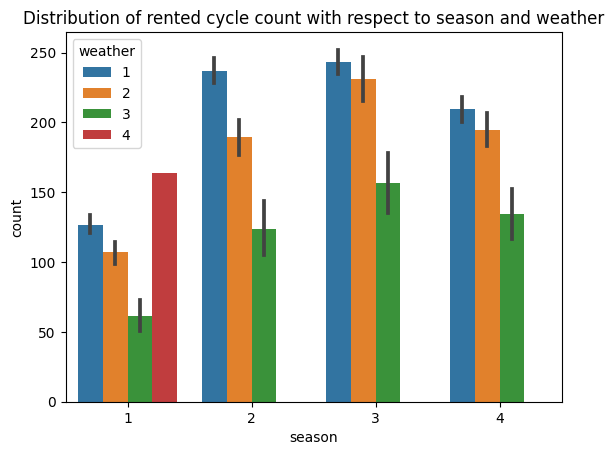

In [15]:
sns.barplot(data=yulu,x='season',y='count',hue='weather')
plt.title('Distribution of rented cycle count with respect to season and weather')
plt.show()

**Outlier detection**

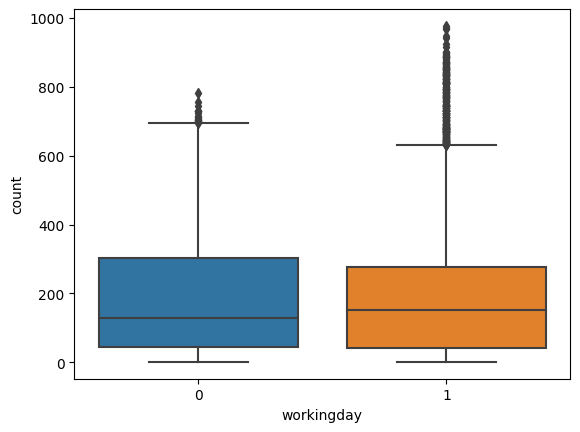

In [16]:
sns.boxplot(data=yulu,x='workingday',y='count')
plt.show()

By visual representation, we can see the outliers present in count of rented cycles used.
Using IQR, we can remove those outliers.

In [17]:
q1=yulu['count'].quantile(0.25)
q3=yulu['count'].quantile(0.75)
iqr=q3-q1
data=yulu[(yulu['count']>(q1-1.5*iqr) ) & (yulu['count']<(q3+1.5*iqr))]

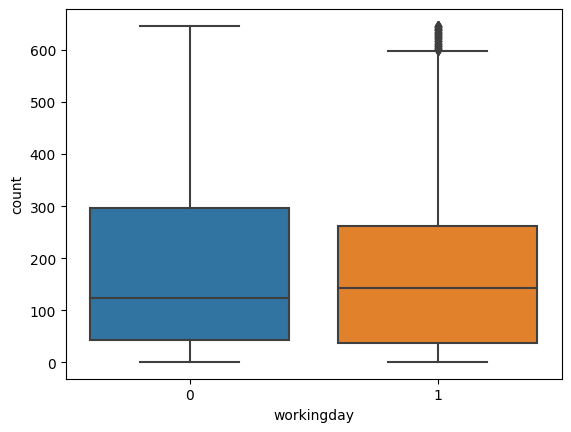

In [18]:
sns.boxplot(data=data,x='workingday',y='count')
plt.show()

## **Insights based on EDA**

1. The dataset contains 10886 rows and 12 features.
2. Season, holiday, workingday, weather are the 4 main categorical variables that we are using for our analysis.
3. By plotting Box plot, we can see that median of working day is slightly higher compared to non working day, meaning that there are more number of rented cycles during working days.
4. Using boxplot, we can see that overall average of number of cycles rented is higher in fall season(season 3).
5. Using boxplot, we can see that overall mean of number of cycles rented is higher when it is not a holiday.
6. We can also see that during weather 1, that is when the weather is - Clear, Few clouds, partly cloudy, partly cloudy, the mean of rented cycle count is higher compared to other weathers.

# **Hypothesis Testing**

### 1. 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

**STEP 1:** Setting null and alternate Hypothesis

**H0:** The count of cycles rented in working day is equal to count of rented cycles in weekend days

**Ha:** The count of cycles rented in working day is greater than count of rented cycles in weekend days

**STEP 2:** Select the appropriate test 



Since standard deviation of population is unknown, we select **T-test** to calculate the p-value. We are going to compare 2 samples, so we are using **2 Sample T-test.**

**STEP 3:** Check test assumptions

<Axes: xlabel='count', ylabel='Count'>

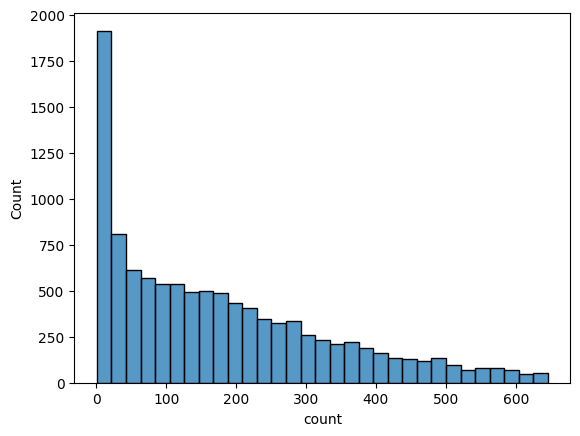

In [19]:
#USING HISTOGRAM
sns.histplot(data=data,x=data['count'])

From histogram graph, we can conclude that count does not follow normal distribution, but we are continuing the approach.

In [20]:
weekday = data[data['workingday'] == 1]['count']
weekend = data[data['workingday'] == 0]['count']

As given in the problem statement, we select alpha = 0.05.


**STEP 4:** Find the p-value

In [21]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(weekday, weekend, alternative = 'greater')
if p_value < 0.05:
    print('p-value = {} ,we reject H0'.format(p_value))
else:
    print('p-value = {} , Accept H0'.format(p_value))

p-value = 0.9928730118891328 , Accept H0


**STEP 5:** Conclusion based on the p-value

From p-value,
we can conclude that count in working days is equal to count in weekend days.


## 2. ANOVA to check if No. of cycles rented is similar or different in different

*   weather
*   season


**WEATHER**

In [22]:
data.weather.value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

Since we have one count in 4th weather, we are omitting 4th weather.

In [23]:
w1 = data[data['weather'] == 1]['count']
w2= data[data['weather'] == 2]['count']
w3 = data[data['weather'] == 3]['count']

**STEP 1:** Setting null and alternate Hypothesis

**H0:** No. of cycles rented is equal in different weather

**Ha:** No. of cycles rented is different in different weather

**STEP 2:** Select the appropriate test 




Since this test based on three samples, we are using ANOVA.
For testing of normality, Shapiro-Wilk’s test is used.


**STEP 3:** Check test assumptions

In [24]:
#shaprio test
#H0: count follows normal distribution
#Ha: count doesn't follows normal distribution
from scipy.stats import shapiro
# Shapiro is best in the 50 to 200 range 
w, p_value = shapiro(data['count'].sample(200)) 
print('The p-value is', p_value)

The p-value is 5.375488942860329e-10


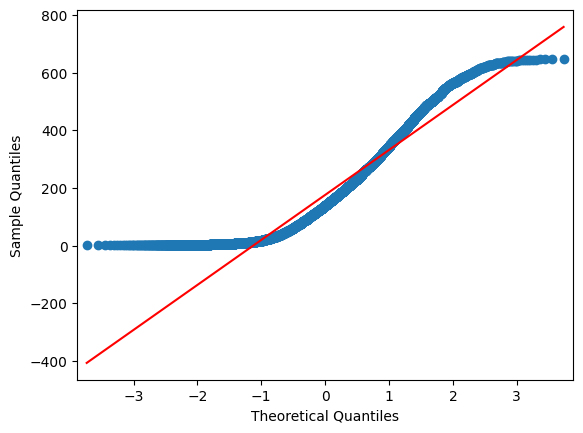

In [25]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['count'], line = "s")
plt.show()


From shaprio test p-value and QQplot,
we can conclude that count does not follow normal distribution, but we are continuing the approach.

**STEP 4:** Find the p-value

In [26]:
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(w1,w2,w3)
print('The p-value is', p_value)

The p-value is 2.749873188252358e-42


**STEP 5:** Conclusion based on the p-value

From p-value,
we can conclude that the count of no. of cycles rented in different in different weather.

**SEASON**

In [27]:
data.season.value_counts()

1    2670
4    2664
2    2633
3    2616
Name: season, dtype: int64

In [28]:
s1 = data[data['season'] == 1]['count']
s2= data[data['season'] == 2]['count']
s3 = data[data['season'] == 3]['count']
s4 = data[data['season'] == 4]['count']

**STEP 1:** Setting null and alternate Hypothesis

**H0:** No. of cycles rented is equal in different season

**Ha:** No. of cycles rented is different in different season

**STEP 2:** Select the appropriate test 




Since this test based on four samples, we are using ANOVA.
For testing of variance, levene test is used.

**STEP 3:** Check test assumptions

In [29]:
#h0: All the count variances are equal
#ha:  At least one variance is different from the other count variance

from scipy.stats import levene
statistic, p_value = levene(s1,s2,s3,s4)
# find the p-value
print('The p-value is', p_value)

The p-value is 2.6643548968275643e-112


From levene test,
we conclude that atleast one variance is different.

**STEP 4:** Find the p-value

In [30]:
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(s1,s2,s3,s4)
print('The p-value is', p_value)

The p-value is 8.891092521664531e-137


**STEP 5:** Conclusion based on the p-value

From p-value,
we can conclude that the count of no. of cycles rented in different in different season.

## Chi-square test to check if Weather is dependent on the season

**STEP 1:** Setting null and alternate Hypothesis

**H0:** Weather is not depedent to season

**Ha:** Weather is depedent to season

**STEP 2:** Select the appropriate test 




Since this test based on two categorical columns, we are using chi-square test.

**STEP 3:** select significance level

alpha = 0.05

**STEP 4:** Find the p-value

In [31]:
from scipy.stats import chi2_contingency
season_weather = pd.crosstab(index = data['season'],
                            columns=data['weather'])
season_weather

weather,1,2,3,4
season,,,,
1,1744,714,211,1
2,1720,690,223,0
3,1842,579,195,0
4,1656,787,221,0


In [32]:
chi_stat, p_value, dof, exp_freq = chi2_contingency(season_weather)
print('the P-value is',p_value)

the P-value is 3.6550317439064943e-07


**STEP 5:** Conclusion based on the p-value

From p-value,
we can conclude that the weather is dependent on season.